### 1. Даны функции для сортировки массивов, которые работают за O(N^2): Пузырек и сортировка выбором, эмпирически определить, какая реализация быстрее и как зависит разница времени исполнения одного и другого от длины входного массива


Как решать:

    1) Генерируем случайный список чисел длины N и его точную копию

    2) Сортируем первый пузырьком, второй - выбором, в обоих случаях засекаем время

    3) Записываем время сортировки при длине N в списки.

    4) Получаем зависимость разницы времени исполнения от длины

    5) Готово, вы восхитительны.

Чтобы повысить точность, для каждого N можно сгенерировать случайный список несколько раз и усреднить время.

In [1]:
def bubble_sort(nums):
    # Устанавливаем swapped в True, чтобы цикл запустился хотя бы один раз
    swapped = True

    while swapped:
        swapped = False

        # Идем циклом по индексам наших элементов
        for i in range(len(nums) - 1):
            #             print(nums)
            # Если текущий элемент слева больше своего элемента справа
            if nums[i] > nums[i + 1]:
                # Меняем элементы местами
                nums[i], nums[i + 1] = nums[i + 1], nums[i]

                # Устанавливаем swapped в True для следующей итерации
                swapped = True

                # По окончании первого прогона цикла for
                # самый большой элемент "Всплывет" наверх


def selection_sort(nums):
    # Значение i соответствует кол-ву отсортированных значений
    for i in range(len(nums)):

        # Исходно считаем наименьшим первый элемент
        lowest_value_index = i

        # Этот цикл перебирает несортированные элементы
        for j in range(i + 1, len(nums)):
            if nums[j] < nums[lowest_value_index]:
                lowest_value_index = j

        # Самый маленький элемент меняем с первым в списке
        nums[i], nums[lowest_value_index] = nums[lowest_value_index], nums[i]



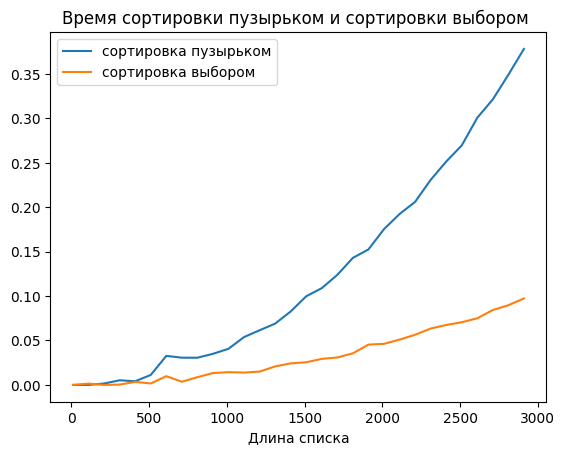

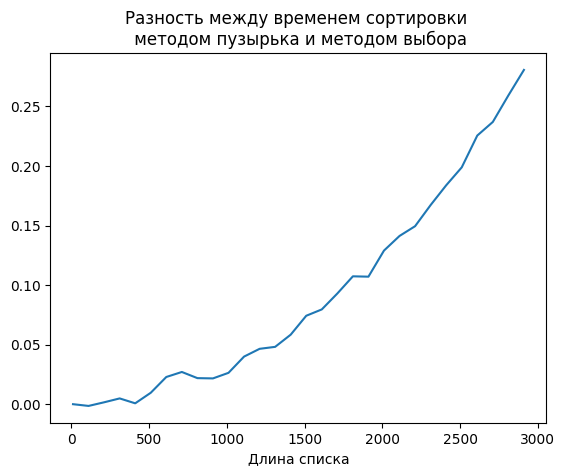

In [5]:
"""ВНИМАНИЕ! КОД ДАННОГО БЛОКА МОЖЕТ ВЫПОЛНЯТЬСЯ ДО НЕСКОЛЬКИХ МИНУТ!"""
import time

from numpy import random


# Пишем функцию, определяющую время сортировки списка nums методом sort_func
def time_taken(sort_func, nums):
    start_time = time.time()
    sort_func(nums)
    end_time = time.time()
    return end_time - start_time


# определяем максимальное значение элемента списка
MAX_GENERATED_NUMBER = 10000
# количество замеров времени для каждой длины списка
ITERATIONS_FOR_SINGLE_LIST_LENGTH = 10
# и набор длин списка, для которых мы будем определять время сортировки
list_lengths = list(range(10, 3010, 100))

sort_time_deltas = []
bubble_sort_times = []
selection_sort_times = []

# проходим по всему набору длин списка
for list_length in list_lengths:
    bubble_sort_time = 0
    selection_sort_time = 0
    # для каждой длины списка заданное количество раз выполняем генерацию списка и измерение времени его сортировки разными методами
    for i in range(ITERATIONS_FOR_SINGLE_LIST_LENGTH):
        nums1 = [random.randint(1, MAX_GENERATED_NUMBER) for _ in range(list_length)]
        nums2 = nums1.copy()
        bubble_sort_time += time_taken(bubble_sort, nums1)
        selection_sort_time += time_taken(selection_sort, nums2)

    # после завершения всех итераций усредняем полученные измерения
    bubble_sort_times.append(bubble_sort_time / ITERATIONS_FOR_SINGLE_LIST_LENGTH)
    selection_sort_times.append(selection_sort_time / ITERATIONS_FOR_SINGLE_LIST_LENGTH)
    sort_time_deltas.append((bubble_sort_time - selection_sort_time) / ITERATIONS_FOR_SINGLE_LIST_LENGTH)

#изображаем результаты на графиках
import matplotlib.pyplot as plt

fig1, ax1 = plt.subplots()
ax1.plot(list_lengths, bubble_sort_times, label="сортировка пузырьком")
ax1.plot(list_lengths, selection_sort_times, label="сортировка выбором")
ax1.set_title("Время сортировки пузырьком и сортировки выбором ")
ax1.set_xlabel("Длина списка")
ax1.legend(loc="upper left")

fig2, ax2 = plt.subplots()
ax2.plot(list_lengths, sort_time_deltas)
ax2.set_title("Разность между временем сортировки \n методом пузырька и методом выбора")
ax2.set_xlabel("Длина списка")
plt.show()

### 2. [Алгоритм имитации отжига](https://machinelearningmastery.com/simulated-annealing-from-scratch-in-python/)

Прочтите статью про алгоритм имитации отжига (я сдернул информацию по ссылке), это простейший не-градиентный алгоритм оптимизации функций(поиска экстремума)


**Задание 1**

Проверьте, как зависит скорость сходимости алгоритма для целевой функии вида $y = x^2$ от:

1) начальной температуры

2) размера шага алгоритма (попробуйте подомножать результаты randn на число и заменить нормальное распределение на равномерное)


**Задание 2**

Попробовать желательно, но не обязательно.

Модифицируйте алгоритм так чтобы он работал для квадратичной функции от двух переменных $x^2 + y^2$ и , если возможно, от n переменных.

##### 2.1 Модификация исходного кода функции simulated_annealing
Т.к. реализованная функция имитации отжига *simulated_annealing* всегда выполняет фиксированное количество итераций, а нас интересует скорость сходимости, необходимо модифицировать ее код таким образом, чтобы при приближении вычисленного ею значения $F(X)$ достаточно близко к действительному минимуму (для $F(X) = x_1^2 + x_2^2 + x_3^2 + ... + x_n^2$ такой минимум всегда $0$) она заканчивала свою работу и возвращала, в том числе, количество выполненных итераций. Именно это количество итераций мы и будем считать характеристикой скорости сходимости (чем меньше итераций - тем быстрее сходится). 

Для этого в качестве входных аргументов *simulated_annealing* мы также будем передавать: 
- критерий сходимости *eps*: при приближении вычисленного *simulated_annealing* значения $F(X)$ к действительному минимуму функции ближе чем на *eps*, функция будет завершать работу; 
- действительное значение минимума $F(X)$ - *objective_target*; хотя в случае с функциями в данном задании это всегда $0$, мы сделаем модификацию для более общего случая; 
- функцию *random_value_generator*, используемую при вычислении значений аргументов $x_1, x_2, ..., x_n$, т.к. во второй части задания нам нужно будет заменить используемую в предоставленной реализации функцию *randn* на функцию *uniform*

Кроме того, мы добавим в код *simulated_annealing* условие завершение работы при приближении найденного на очередной итерации значения $F(X)$ к действительному минимуму.    

Все изменения, сделанные в коде исходной функции, помечены соответствующими комментариями.                    



In [67]:
# simulated annealing search of a one-dimensional objective function
from numpy import asarray
from numpy import exp
from numpy.random import randn
from numpy.random import rand
from numpy.random import seed

""" MODIFICATION: Добавлены три дополнительных аргумента, описанные в тексте выше """
def simulated_annealing(objective, bounds, n_iterations, step_size, temp, objective_target, eps,
                        random_value_generator):
    # generate an initial point
    best = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    # evaluate the initial point
    best_eval = objective(best)
    # current working solution
    curr, curr_eval = best, best_eval
    # run the algorithm
    for i in range(n_iterations):
        # take a step
        """MODIFICATION: Функция randn изменена на передаваемую извне random_value_generator"""
        candidate = curr + random_value_generator(len(bounds)) * step_size
        # evaluate candidate point
        candidate_eval = objective(candidate)
        # check for new best solution
        if candidate_eval < best_eval:
            # store new best point
            best, best_eval = candidate, candidate_eval
            # report progress
            # print('>%d f(%s) = %.5f' % (i, best, best_eval))
            # difference between candidate and current point evaluation
            """MODIFICATION: Добавлено условие выхода из функции при попадании найденного значения в заданную окрестность действительного минимума """
            if abs(best_eval - objective_target) < eps:
                return [best, best_eval, i]
        diff = candidate_eval - curr_eval
        # calculate temperature for current epoch
        t = temp / float(i + 1)
        # calculate metropolis acceptance criterion
        metropolis = exp(-diff / t)
        # check if we should keep the new point
        if diff < 0 or rand() < metropolis:
            # store the new current point
            curr, curr_eval = candidate, candidate_eval
    return [best, best_eval, n_iterations]

##### 2.2 Вспомогательные функции
Для удобства введем две вспомогательные функции, которые упростят дальнейший анализ   

In [ ]:
import numpy as np
def get_arguments_and_mean_values(func, arguments_seq, evaluations_count=30):
    """Возвращает список значений аргумента и список соответствующих средних значений функции func на последовательности значений аргумента 
    arguments_seq. Средние значения функции получаются путем многократного вычисления func для каждого значения аргумента и усреднения полученных 
    значений. Вычисление проводится evaluations_count раз"""
    arguments = []
    values = []

    for argument in arguments_seq:
        arguments.append(argument)
        values.append(np.mean([func(argument) for i in range(evaluations_count)]))

    return arguments, values


def plot_graph(arguments, values, graph_name='', x_axis_name='', y_axis_name=''):
    """Изображает график функции, заданной списком значений аргумента (arguments) и списком соответствующих значений функции (values).
    Использует graph_name в качестве заголовка графика, а x_axis_value и y_axis_value в качестве подписей осей x и y"""
    fig, ax = plt.subplots()
    ax.plot(arguments, values)
    ax.set_title(graph_name)
    ax.set_xlabel(x_axis_name)
    ax.set_ylabel(y_axis_name)

##### 2.3 Анализ зависимости скорости сходимости алгоритма от шага и температуры для функции $f(x) = x^2$ (при использовании randn на шаге алгоритма)

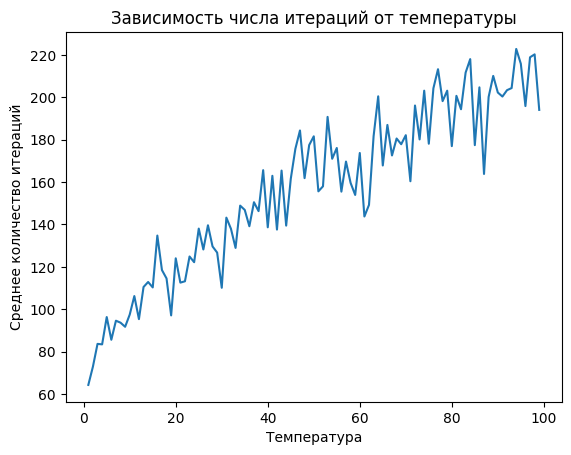

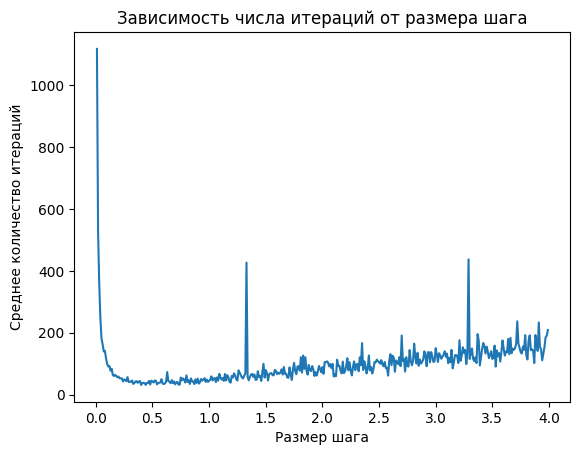

In [92]:
""" Определим исследуемую алгоритмом функцию """
def objective(x):
    return x[0] ** 2.0


""" Введем обертки над функцией имитации отжига simulated_annealing так, чтобы они фиксировали значения всех ее аргументов, 
кроме того, для которого мы будем исследовать зависимость скорости сходимости, а также возвращали только количество итераций, 
за которое было найдено подходящее решение"""
def get_annealing_iteration_for_temperature(temp_value):
    return simulated_annealing(
        objective, bounds=asarray([[-5.0, 5.0]]),
        n_iterations=10000,
        step_size=0.1,
        temp=temp_value,
        objective_target=0,
        eps=0.001,
        random_value_generator=randn)[2]


def get_annealing_iteration_for_step_size(step_size_value):
    return simulated_annealing(
        objective, bounds=asarray([[-5.0, 5.0]]),
        n_iterations=10000,
        step_size=step_size_value,
        temp=10,
        objective_target=0,
        eps=0.001,
        random_value_generator=randn)[2]


""" И воспользуемся введенными ранее функциями для построения и отображения на графике зависимости скорости сходимости алгоритма имитации
отжига от температуры (на диапазоне от 1 до 100 с шагом в 1) """
plot_graph(*get_arguments_and_mean_values(get_annealing_iteration_for_temperature, range(1, 100)),
           graph_name="Зависимость числа итераций от температуры",
           x_axis_name="Температура",
           y_axis_name="Среднее количество итераций")

""" И от величины шага (на диапазоне от 0.01 до 4)"""
plot_graph(
    *get_arguments_and_mean_values(get_annealing_iteration_for_step_size, [float(i) / 100 for i in range(1, 400)]),
    graph_name="Зависимость числа итераций от размера шага",
    x_axis_name="Размер шага",
    y_axis_name="Среднее количество итераций")

##### 2.3 Анализ зависимости скорости сходимости алгоритма от шага и температуры для функции $f(x) = x^2$ (при использовании uniform на шаге алгоритма)


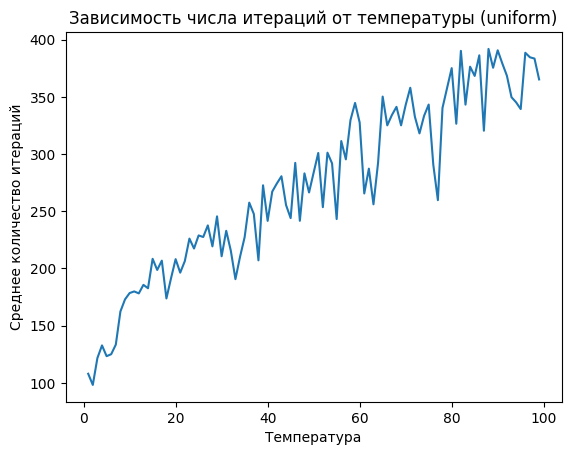

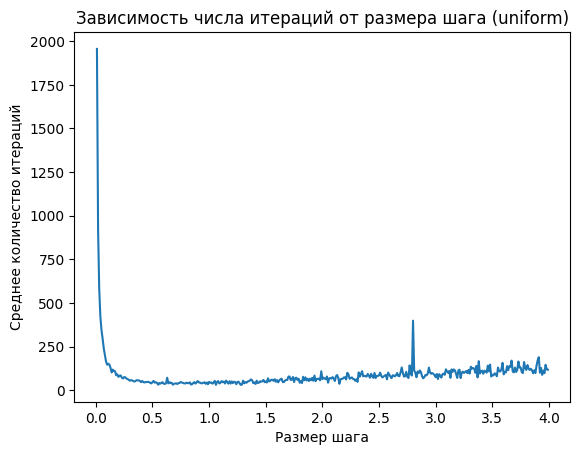

In [93]:
"""Сначала отметим, что при замене псевдослучайной величины с нормальным распределением на величину с равномерным распределением 
имеет значение выбор диапазона, для которого мы генерируем ее значение. Так, если использовать значения по-умолчанию для uniform, 
то значения будут генерироваться в диапазоне [0,1). Т.к. очередное значение аргумента функции при имитации отжига получается как 
candidate = curr + <random value> * step_size, то при таком диапазоне каждое следующее значение candidate будет больше предыдущего. 
Если при этом искомая точка находится на оси x левее, то мы никогда не дойдем до нее, т.к. движемся в другую сторону. В связи с этим 
мы будем генерировать значение величины с равномерным распределением в диапазоне [-1,1) """

from numpy.random import uniform

"""Введем обертку над random.uniform, чтобы задать диапазон [-1,1)"""
def modified_uniform(size):
    return uniform(-1.0, 1.0, size)


""" Снова введем обертки над simulated_annealing, но изменив функцию генерации случайного значения"""
def get_annealing_iteration_for_temperature(temp_value):
    return simulated_annealing(
        objective, bounds=asarray([[-5.0, 5.0]]),
        n_iterations=10000,
        step_size=0.1,
        temp=temp_value,
        objective_target=0,
        eps=0.001,
        random_value_generator=modified_uniform)[2]


def get_annealing_iteration_for_step_size(step_size_value):
    return simulated_annealing(
        objective, bounds=asarray([[-5.0, 5.0]]),
        n_iterations=10000,
        step_size=step_size_value,
        temp=10,
        objective_target=0,
        eps=0.001,
        random_value_generator=modified_uniform)[2]


""" И построим графики зависимости скорости сходимости алгоритма от температуры (на диапазоне от 1 до 100 с шагом в 1) """
plot_graph(*get_arguments_and_mean_values(get_annealing_iteration_for_temperature, range(1, 100)),
           graph_name="Зависимость числа итераций от температуры (uniform)",
           x_axis_name="Температура",
           y_axis_name="Среднее количество итераций")

""" И от величины шага (на диапазоне от 0.01 до 4)"""
plot_graph(
    *get_arguments_and_mean_values(get_annealing_iteration_for_step_size, [float(i) / 100 for i in range(1, 400)]),
    graph_name="Зависимость числа итераций от размера шага (uniform)",
    x_axis_name="Размер шага",
    y_axis_name="Среднее количество итераций")

##### 2.4 Анализ зависимости скорости сходимости алгоритма от шага и температуры для функции $f(x) = x^2 + y^2 + z^2$
Имеющийся код реализации алгоритма имитации отжига уже позволяет выполнять оптимизацию функций n-переменных, т.к. в качестве аргумента функции 
использует вектор. Для примера посмотрим на скорость сходимости алгоритма для для функции трех переменных. Для определения значения на очередном шаге 
алгоритма будем использовать функцию randn  

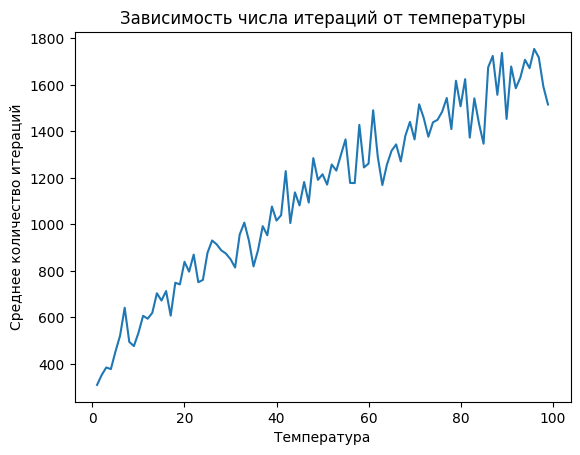

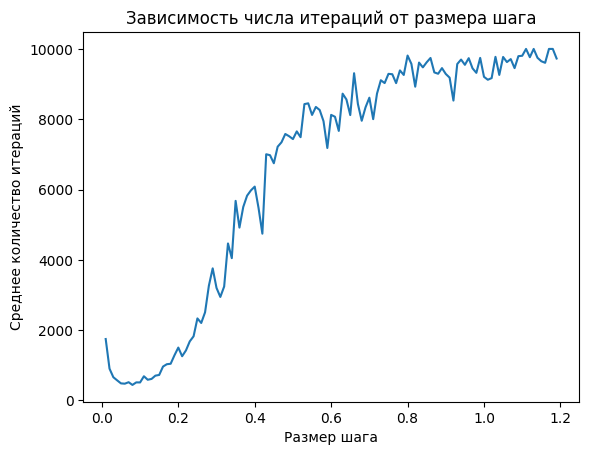

In [95]:
"""!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!"""
"""ВНИМАНИЕ! КОД ДАННОГО БЛОКА МОЖЕТ ВЫПОЛНЯТЬСЯ ДО НЕСКОЛЬКИХ МИНУТ!"""
""" Определим функцию """
def objective(x):
    return x[0] ** 2.0 + x[1] ** 2 + x[2] ** 2


""" Введем обертки над функцией имитации отжига simulated_annealing"""
def get_annealing_iteration_for_temperature(temp_value):
    return simulated_annealing(
        objective,
        bounds=asarray([[-5.0, 5.0], [-5.0, 5.0], [-5.0, 5.0]]),
        n_iterations=10000,
        step_size=0.1,
        temp=temp_value,
        objective_target=0,
        eps=0.001,
        random_value_generator=randn)[2]


def get_annealing_iteration_for_step_size(step_size_value):
    return simulated_annealing(
        objective,
        bounds=asarray([[-5.0, 5.0], [-5.0, 5.0], [-5.0, 5.0]]),
        n_iterations=10000,
        step_size=step_size_value,
        temp=10,
        objective_target=0,
        eps=0.001,
        random_value_generator=randn)[2]


""" И воспользуемся введенными ранее функциями для построения и отображения на графике зависимости скорости сходимости алгоритма имитации
отжига от температуры (на диапазоне от 1 до 100 с шагом в 1) """
plot_graph(*get_arguments_and_mean_values(get_annealing_iteration_for_temperature, range(1, 100)),
           graph_name="Зависимость числа итераций от температуры",
           x_axis_name="Температура",
           y_axis_name="Среднее количество итераций")

""" И от величины шага (на диапазоне от 0.01 до 1,2)"""
plot_graph(
    *get_arguments_and_mean_values(get_annealing_iteration_for_step_size, [float(i) / 100 for i in range(1, 120, 3)]),
    graph_name="Зависимость числа итераций от размера шага",
    x_axis_name="Размер шага",
    y_axis_name="Среднее количество итераций")

### 3. Подсчет слов
Давайте теперь поработаем с настоящим файлом и действительно посчитаем в нем слова. Мы загрузим метаданные почтового сервера университета Мичигана. И попробуем **найти, с какого адреса ушло больше всего писем.**

In [6]:
# импортируем библиотеку для доступа к файлам в интернете
import requests

# в переменной mbox хранится текст для работы
mbox = requests.get('http://www.py4inf.com/code/mbox.txt').text

In [18]:
amount_of_emails_by_sender = {}

# разбиваем файл на строки и ищем строки, начинающиеся с "From:" (для каждого письма такая строка одна)
for line in mbox.split('\n'):
    if line.startswith('From:'):
        sender = line.split()[1]  #получаем e-mail отправителя
        #увеличиваем количество писем в словаре для данного отправителя
        amount_of_emails_by_sender[sender] = amount_of_emails_by_sender.get(sender, 0) + 1

# сортируем списки отправителей по количеству писем и берем последний элемент 
most_frequent_sender = sorted(amount_of_emails_by_sender.items(), key=lambda item: item[1])[-1]
print(f'Наибольшее количество писем ({most_frequent_sender[1]} штук) отправил адресат {most_frequent_sender[0]}')

Наибольшее количество писем (195 штук) отправил адресат zqian@umich.edu


### 4. Напишите функцию, которая переводит число, записанное римскими цифрами, в десятичное

Символы для римских цифр:

    I             1
    V             5
    X             10
    L             50
    C             100
    D             500
    M             1000


Например, 2 записывается как II .

12 записывается как XII, что просто X + II.

Число 27 записывается как XXVII, что равно XX + V + II.

Римские цифры обычно записываются от большего к меньшему слева направо. Однако символы для 4 не IIII. Вместо этого число четыре записывается как IV, потому что если I стоит перед V, мы "вычитаем его", получая тем самым четыре. Тот же принцип работает и для числа девять, которое записывается как IX. Существует шесть случаев, когда используется вычитание:

    I может быть помещен перед V (5) и X (10) для получения 4 и 9.
    X может быть помещен перед L (50) и C (100) для получения 40 и 90.
    C может быть помещен перед D (500) и M (1000), чтобы получить 400 и 900.

##### Простая функция перевода римской записи числа в десятичную. 
Ниже приведена простая функция перевода. Ее недостаток в том, что любое корректное с точки зрения правил записи римских чисел число она переведет в десятичный вид корректно, но если запись числа некорректная, то она тоже будет переведена в какое-нибудь десятичное число. Такую функцию можно использовать там, где на вход гарантированно приходит корректная запись

In [74]:
values_of_roman_digits = {'I': 1, 'V': 5, 'X': 10, 'L': 50, 'C': 100, 'D': 500, 'M': 1000}

def roman_number_to_decimal(roman_number):
   
    # проверяем, что строка с записью числа содержит только допустимые римские цифры
    if not all([digit in values_of_roman_digits.keys() for digit in roman_number]):
        raise ValueError("Строка с римской записью числа содержит недопустимые символы")

    result = 0
    value_of_right_digit = 0

    # проходим по записи числа в обратном порядке 
    for digit in roman_number[::-1]:
        value_of_current_digit = values_of_roman_digits[digit]

        if value_of_current_digit >= value_of_right_digit:
            # если значение текущей цифры больше или равно значению стоящей справа, 
            # то это значение просто прибавляется к числу
            result += value_of_current_digit
        else:
            # если справа от текущей стоит римская цифра с большим значением, 
            # то значение текущей цифры нужно вычесть из итогового числа 
            result -= value_of_current_digit
        value_of_right_digit = value_of_current_digit

    return result

roman_number = "XXXIV"
print(f'Корректно записанное число {roman_number} переводится в соответствующее десятичное представление {roman_number_to_decimal(roman_number)}')

roman_number = "XXIXVII"
print(f'Но и некорректно записанное число {roman_number} переводится в соответствующее десятичное представление {roman_number_to_decimal(roman_number)}')


Корректно записанное число XXXIV переводится в соответствующее десятичное представление 34
Но и некорректно записанное число XXIXVII переводится в соответствующее десятичное представление 36


##### Продвинутая реализация функции перевода римской записи числа в десятичную (генерирует ValueError для некорректных чисел)
Метод ниже переводит в десятичную форму представления только корректно записанные римские числа. Для всех остальных строк он выдает ошибку. Работа метода основана на таблице соответствия записей десятичных разрядов числа в римской нотации 

In [77]:
decimal_numbers_representation = [['I', 'II', 'III', 'IV', 'V', 'VI', 'VII', 'VIII', 'IX'], # запись единиц от 1 до 9
                                  ['X', 'XX', 'XXX', 'XL', 'L', 'LX', 'LXX', 'LXXX', 'XC'], # запись десяток от 1 до 9
                                  ['C', 'CC', 'CCC', 'CD', 'D', 'DC', 'DCC', 'DCCC', 'CM'], # запись сотен от 1 до 9
                                  ['M', 'MM', 'MMM']]                                       # запись тысяч от 1 до 3


def roman_number_to_decimal_adv(roman_number:str):
    result = 0
       
    for power_of_ten in range(len(decimal_numbers_representation)): 
        # проходим от римских записей единиц до римских записей для тысяч 
        # и выделяем их в строке, начиная с ее конца
        representations = decimal_numbers_representation[power_of_ten] 
        if power_of_ten == 3: 
            # для записей тысяч задаем обычный обратный порядок обхода представлений 
            i_range = (3,2,1)
        else:
            # для всех остальных записей - задаем обратный порядок, меняя местами 4 и 5 элемент (чтобы, например,
            # IV искалось в конце строки до V, т.к. иначе и IV, и V будет интерпретировано как V
            i_range = (9,8,7,6,4,5,3,2,1)
        for i in i_range:
            # обходим все представления для единиц, десятков, сотен или тысяч в заданном ранее порядке
            # и соответствующим образом увеличиваем десятичное значение числа; а в строке удаляем уже
            # обработанный фрагмент
            repr = representations[i-1]
            if roman_number.endswith(repr): 
                result += i * (10 ** power_of_ten)
                roman_number = roman_number.replace(repr, '', 1) 
                break
    # если после обработки в строке еще остались символы, значит запись числа была некорректной
    if len(roman_number) == 0: 
        return result
    raise ValueError("Запись числа римскими цифрами не соответствует правилам записи таких чисел")
            
            
roman_number = "XXXIV"
print(f'Теперь корректно записанное число {roman_number} переводится в соответствующее десятичное представление {roman_number_to_decimal_adv(roman_number)}')

roman_number = "XXIXVII"
print(f'А вот некорректно записанное число {roman_number} генерирует ошибку:')
roman_number_to_decimal_adv(roman_number)           
            

Теперь корректно записанное число XXXIV переводится в соответствующее десятичное представление 34
А вот некорректно записанное число XXIXVII генерирует ошибку:


ValueError: Запись числа римскими цифрами не соответствует правилам записи таких чисел

##### Проверка корректности работы функций перевода на всем множестве чисел, которые можно записать в указанном алфавите (от 1 до 3999)
Дополнительно выполним проверку, что обе написанные выше функции перевода корректно переводят числа от 1 до 3999, записанных в римской нотации, в десятичное представление 

In [79]:
# определим функции преобразования десятичного числа в римскую запись 
def decimal_number_to_roman(dec_number:int):
    result = ""
    power_of_ten = 0
    while dec_number > 0: 
        i = dec_number % 10
        if i > 0: 
            result = decimal_numbers_representation[power_of_ten][i-1] + result
        dec_number = dec_number // 10
        power_of_ten += 1
    return result

# а теперь для каждого числа от 1 до 3999 сформируем его римскую запись и преобразуем 
# ее обратно в десятичную, сравнив с исходным значение 
all_works_fine = True
for num in range(1, 4000): 
    roman_notation = decimal_number_to_roman(num)
    n1 = roman_number_to_decimal(roman_notation)
    n2 = roman_number_to_decimal_adv(roman_notation)
    all_works_fine = all_works_fine and (n1 == num) and (n2 == num)

print('Для всех чисел от 1 до 3999 римская запись была корректно переведена в десятичную:', all_works_fine)

Для всех чисел от 1 до 3999 римская запись была корректно переведена в десятичную: True


### 5. Напишите декоратор, который сначала выводит на печать имя вызываемой функции, затем делает паузу в 3 секунды, а затем вызывает функцию

(Про имя вызываемой функции можно глянуть в лекции - там один из декораторов такое делал)

In [81]:
import time

def print_function_name_then_sleep_then_run(func):
    def func_wrapper(*args, **kwargs):
        print("Function name is:", func.__name__)
        print("Let's take a nap for 3 sec")
        time.sleep(3)
        print("I woke up")
        return func(*args, **kwargs)
    return func_wrapper


@print_function_name_then_sleep_then_run
def print_greeting(greeting):
  print(greeting)

@print_function_name_then_sleep_then_run
def say_goodbye():
    print("Goodbye!")

print_greeting("Well, hello...")
print("")
say_goodbye()

Function name is: print_greeting
Let's take a nap for 3 sec
I woke up
Well, hello...

Function name is: say_goodbye
Let's take a nap for 3 sec
I woke up
Goodbye!


### 6. Функции ошибок

В целом, машинное обучение часто сводится к минимизации какого-то функционала ошибки. Ваш алгоритм на обучающей выборке возвращает список предсказаний, который вы с помощью какого-то функционала сравниваете с правильными ответами и получаете некое значение (ошибку), которую нужно минимизировать. В этом задании необходимо реализовать ряд функционалов ошибок.


### Пример - MSE

In [82]:
from typing import List


def mse(prediction: List[float],
        actual_values: List[float]) -> float:
    '''
    На вход приходят два списка равной длины
    На выходе мы получаем среднеквадратичную ошибку
    '''
    assert len(prediction) == len(actual_values)

    N = len(prediction)
    mse = sum((prediction[i] - actual_values[i]) ** 2 for i in range(N)) / N

    return mse

In [86]:
a = [1, 2, 3, 4, 5]
b = [1, 2, 3, 10, 6]

mse(a, b) == (6 ** 2 + 1) / 5

True

Аналогичным образом реализуйте следующий список функций ошибок:

    RMSE, LogLoss, HueberLoss, MAE, MAPE, sMAPE, log-cosh loss, quantile loss  :) 

Вопросы можно задавать

### RMSE (root mean square error)

$RMSE = \sqrt{\frac{1}{N}\sum\limits_{i=1}^N(y_i-\hat{y_i})^2}$

$y_i$ - истинное значение

$\hat{y_i}$ - предсказанное значение

In [89]:
from typing import List
import numpy as np

def rmse(prediction:List[float], actual_values:List[float]) -> float:
   
    assert len(prediction) == len(actual_values)

    N = len(prediction)
    return np.sqrt(sum((actual_values[i] - prediction[i])**2 for i in range(N))/N)


In [90]:
p = [1, 2, 3, 4, 5]
a = [1, 2, 3, 10, 6]

rmse(p, a) == np.sqrt((6 ** 2 + 1) / 5)

True

### LogLoss
$Logloss = -\frac{1}{N}\sum\limits_{i=1}^N[y_i \cdot ln(p_i) + (1-y_i) \cdot ln(1-p_i)]$

$y_i$ - истинный класс наблюдения

$p_i$ - предсказанная вероятность

In [97]:
from typing import List
import numpy as np

def log_loss(prediction: List[float],
             actual_values: List[float]) -> float:
    
    assert len(prediction) == len(actual_values)

    N = len(prediction)
    result = sum(actual_values[i] * np.log(prediction[i]) + (1 - actual_values[i]) * np.log(1 - prediction[i]) for i in range(N))
    return -result / N

In [99]:
p = [0.8, 0.9, 0.7, 0.8, 0.5]
a = [1, 2, 3, 10, 6]

r1 = log_loss(p, a) 
r2 =  -  (1 * np.log(0.8) + (1 - 1) * np.log(1 - 0.8)
        + 2 * np.log(0.9) + (1 - 2) * np.log(1 - 0.9)
        + 3 * np.log(0.7) + (1 - 3) * np.log(1 - 0.7)
        + 10 * np.log(0.8) + (1 - 10) * np.log(1 - 0.8)
        + 6 * np.log(0.5) + (1 - 6) * np.log(1 - 0.5))/5

abs(r1 - r2) < 0.0000001

True

### HueberLoss
\begin{equation*}
X(\omega) = 
 \begin{cases}
   0.5 \cdot(y_i - \hat{y_i})^2  &\text{ ,если $|y_i - \hat{y_i}| <delta$}\\
   delta \cdot (|y_i - \hat{y_i}|-0.5 \cdot delta) &\text{ ,иначе}
 \end{cases}
\end{equation*}


$y_i$ - истинное значение

$\hat{y_i}$ - предсказанное значение

In [109]:
def huber_loss(prediction: List[float], actual_values: List[float], delta: float) -> float:
    
    assert len(prediction) == len(actual_values)
    
    res = []
    for i in range(len(prediction)):
        s = abs(actual_values[i] - prediction[i])
        if s < delta: 
            res.append(0.5 * (s ** 2))
        else: 
            res.append(delta * (s - 0.5 * delta))
            
    return res

In [111]:
p = [1, 2, 3, 4, 5]
a = [1, 2, 3, 10, 6]
delta = 0.3

r1 = huber_loss(p, a, delta) 
r2 = [0, 0, 0, delta*(6 - 0.5*delta), delta*(1 - 0.5*delta)]

all(abs(r1[i]-r2[i]) < 0.00001 for i in range(len(r1)))

True

### MAE (Mean Absolute Error)
$MAE = \frac{1}{N}\sum\limits_{i=1}^N|y_i-\hat{y_i}|$


$y_i$ - истинное значение

$\hat{y_i}$ - предсказанное значение

In [112]:
def mae(prediction: List[float], actual_values: List[float]) -> float:
    
    assert len(prediction) == len(actual_values)
    
    N = len(prediction)
    return sum(abs(actual_values[i] - prediction[i]) for i in range(N)) / N    

In [113]:
p = [1, 2, 3, 4, 5]
a = [1, 2, 3, 10, 6]

mae(p, a) == (6 + 1) / 5

True

### MAPE (Mean Absolute Percentage Error)
$MAPE = 100\% \cdot\frac{1}{N}\sum\limits_{i=1}^N\cfrac{|y_i-\hat{y_i}|}{|y_i|}$

$y_i$ - истинное значение

$\hat{y_i}$ - предсказанное значение

In [116]:
def mape(prediction: List[float], actual_values: List[float]) -> float:
    
    assert len(prediction) == len(actual_values)
    
    N = len(prediction)
    return 100 * sum(abs((actual_values[i] - prediction[i])/actual_values[i]) for i in range(N)) / N

In [117]:
p = [1, 2, 3, 4, 5]
a = [1, 2, 3, 10, 6]

mape(p, a) == (6/10 + 1/6) * 100 / 5

True

### sMAPE (Symmetric Mean Absolute Percentage Error)
$SMAPE = 100\% \cdot\frac{1}{N}\sum\limits_{i=1}^N\cfrac{2|y_i-\hat{y_i}|}{y_i+\hat{y_i}}$

$y_i$ - истинное значение

$\hat{y_i}$ - предсказанное значение

In [118]:
def mape(prediction: List[float], actual_values: List[float]) -> float:
    
    assert len(prediction) == len(actual_values)
    
    N = len(prediction)
    return 100 * 2 * sum(abs(actual_values[i] - prediction[i])/(actual_values[i] + prediction[i]) for i in range(N)) / N

In [119]:
p = [1, 2, 3, 4, 5]
a = [1, 2, 3, 10, 6]

mape(p, a) == 100 * 2 * (6/14 + 1/11) / 5

True

### log-cosh loss
$logcosh = \frac{1}{N}\sum\limits_{i=1}^Nlog(\frac{exp(y_i-\hat{y_i}) + exp(\hat{y_i}-y_i)}{2})$


$y_i$ - истинное значение

$\hat{y_i}$ - предсказанное значение

In [120]:
def logcosh(prediction: List[float], actual_values: List[float]) -> float:
    
    assert len(prediction) == len(actual_values)
    
    N = len(prediction)
    res = 0
    for i in range(N):
        s = actual_values[i] - prediction[i]
        res+= np.log((np.exp(s) + np.exp(-s))/2)
        
    return res / N

In [121]:
p = [1, 2, 3, 4, 5]
a = [1, 2, 3, 10, 6]

logcosh(p, a) == (np.log((np.exp(6) + np.exp(-6))/2)  + np.log((np.exp(1) + np.exp(-1))/2)) / 5

True

### quantile loss
$QuantileLoss = \frac{1}{N}\sum\limits_{i=1}^Nmax(q * (y_i-\hat{y_i}), (1-q) * (\hat{y_i}-y_i))$

$y_i$ - истинное значение

$\hat{y_i}$ - предсказанное значение

$q$ - квантиль

In [122]:
def quantile_loss(prediction: List[float], actual_values: List[float], q:float) -> float:
    
    assert len(prediction) == len(actual_values)
    
    N = len(prediction)
    res = 0
    for i in range(N):
        s = actual_values[i] - prediction[i]
        res+= max(q*s, (1-q)*-s)
        
    return res / N

In [123]:
p = [1, 2, 3, 4, 5]
a = [1, 2, 3, 10, 6]
q = 0.3

quantile_loss(p, a, q) == (max(6*0.3, -6*0.7)  + max(1*0.3, -1*0.7)) / 5

True